In [88]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [89]:
df = pd .read_csv("train.csv")

df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [90]:
df = pd .read_csv("train.csv")

df_scaled = df.drop("Survived", axis=1)
df_scaled = df_scaled.drop("Name", axis=1)

df_scaled["Sex"] = (df_scaled["Sex"] == "male").astype(int)

df_scaled.head()

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500


In [91]:
m,n = df_scaled.shape



# Min-Max Scaling (Normalization)
"""
for i in range(n):
    series = df_scaled.iloc[:, i]
    min_value = series.min()
    max_value = series.max()
    df_scaled.iloc[:, i] = (series - min_value) / (max_value - min_value)

print(df_scaled.head())
"""

#standardization Scaling 

for i in range(n):    
    x= df_scaled.iloc[:, i]
    mean_value = x.mean()
    std_deviation = abs(x.std())
    stanadardized_x = (x - mean_value) / std_deviation
    df_scaled.iloc[:, i]= stanadardized_x

df_scaled.head()


,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0.826213,0.775715,-0.516323,0.406014,-0.482881,-0.527431
1,-1.569390,-1.286900,0.609757,0.406014,-0.482881,0.840329
2,0.826213,-1.286900,-0.234803,-0.491573,-0.482881,-0.513013
3,-1.569390,-1.286900,0.398617,0.406014,-0.482881,0.451931
4,0.826213,0.775715,0.398617,-0.491573,-0.482881,-0.510343


In [92]:
Y = df.iloc[:,0]
X = df_scaled.to_numpy()
print(X)

[[ 0.8262132   0.77571458 -0.51632318  0.40601431 -0.48288082 -0.52743136]
 [-1.5693899  -1.28689976  0.60975657  0.40601431 -0.48288082  0.84032938]
 [ 0.8262132  -1.28689976 -0.23480324 -0.49157288 -0.48288082 -0.51301326]
 ...
 [-1.5693899  -1.28689976  0.68013656  0.40601431 -0.48288082  0.51173982]
 [ 0.8262132  -1.28689976 -0.79784312  0.40601431 -0.48288082 -0.373461  ]
 [ 0.8262132   0.77571458  0.18747667 -0.49157288 -0.48288082 -0.51301326]]


In [93]:
"""
for i in range(4):
    plt.scatter(df_scaled.iloc[:, i],Y)
    plt.show()
"""

'\nfor i in range(4):\n    plt.scatter(df_scaled.iloc[:, i],Y)\n    plt.show()\n'

In [94]:
w = np.zeros(n)
b = 0

alpha = 0.001
lamb = 1

epochs = 30000

Cost = np.zeros(epochs)
iter = np.linspace(0, epochs-1, epochs)

for i in range(epochs):
    z = np.dot(X,w) + b
    Y_pred = 1 / (1 + np.exp((-1)*z))
    
    D_w = (1/m)*np.sum(Y_pred- Y)*X + (lamb/m) * w
    D_b = (1/m)*np.sum(Y_pred- Y)

    cost = (-1/m) * np.sum(Y @ np.log(Y_pred)+(1-Y)@np.log(1-Y_pred)) + (lamb/(2*m))*np.sum(w**2)
    Cost[i] = cost
    
    w = w - alpha * D_w[0]
    b = b - alpha * D_b

print(w, b)

[-0.35898854 -0.33704695  0.22434174 -0.17641268  0.20981108  0.22916822] -0.45395810386781593


In [95]:
"""
for i in range(m):
    print(Y_pred[i], Y[i])
"""
print(cost)


0.5786870463995796


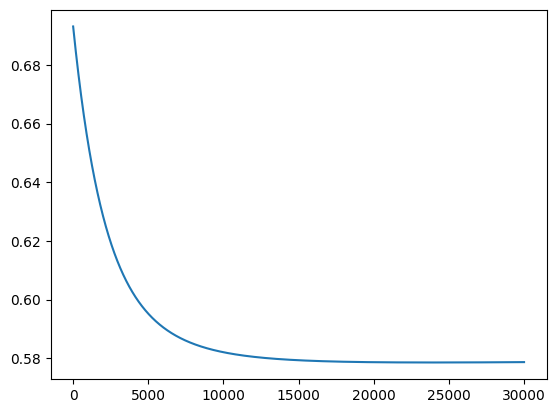

0.578562347746607


In [96]:
plt.plot(iter, Cost)
plt.show()
print(Cost.min())

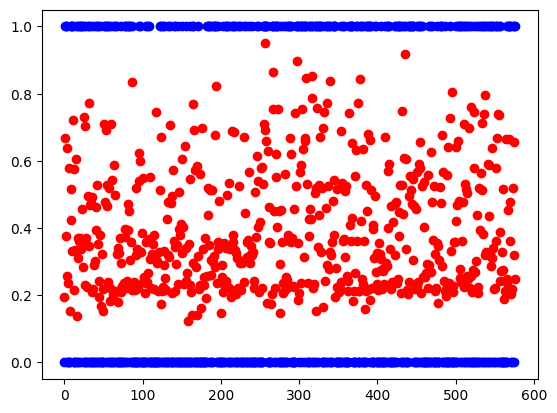

In [97]:
plt.scatter(np.linspace(0, m-1, m), Y_pred, color="red")
plt.scatter(np.linspace(0, m-1, m), Y, color="blue")
plt.show()

# TESTING

In [109]:
def confusion_matrix(y_true, y_pred):
	X = np.array([[0, 0], [0, 0]])
	for i in range(len(y_true)):
		if y_true[i] == 0:
			if y_true[i] == y_pred[i]:
				X[0][0] += 1
				continue
			X[0][1] += 1
			continue
		if y_true[i] == y_pred[i]:
			X[1][1] += 1
			continue
		X[1][0] += 1
	return X

In [110]:
df_test = pd.read_csv("test.csv")
df_test = df_test.drop("Name", axis=1)
df_test["Sex"] = df_test["Sex"].replace({'female':0, 'male':1})
df_test_scaled = df_test.drop("Survived", axis=1)

df_test.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,1,2,0,25.0,1,1,30.0000
1,1,1,0,39.0,1,1,110.8833
2,0,2,1,54.0,0,0,26.0000
3,0,1,1,36.0,0,0,40.1250
4,0,3,1,16.0,0,0,8.7125


In [111]:
m_test, n_test = df_test_scaled.shape

for i in range(n_test):    
    x= df_test_scaled.iloc[:, i]
    mean_value = x.mean()
    std_deviation = abs(x.std())
    stanadardized_x = (x - mean_value) / std_deviation
    df_test_scaled.iloc[:, i]= stanadardized_x

df_test_scaled.head()

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,-0.352764,-1.479457,-0.337885,0.474615,0.701947,-0.054253
1,-1.541425,-1.479457,0.663653,0.474615,0.701947,1.417661
2,-0.352764,0.673743,1.736729,-0.444952,-0.461709,-0.127045
3,-1.541425,0.673743,0.449037,-0.444952,-0.461709,0.130001
4,0.835897,0.673743,-0.981731,-0.444952,-0.461709,-0.441643


In [112]:
X_test = df_test_scaled
Y_test = df_test["Survived"]

z_test = np.dot(X_test,w) + b
Y_pred_test = 1 / (1 + np.exp((-1)*z_test))

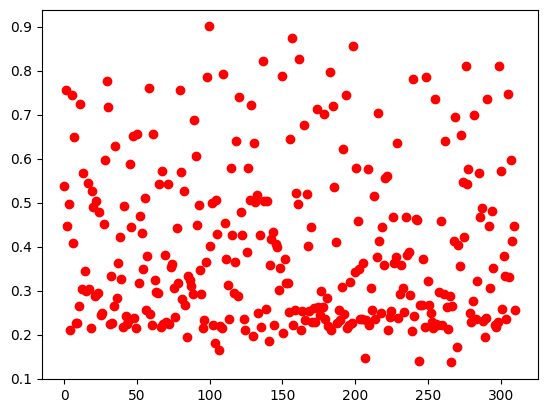

In [113]:
plt.scatter(np.linspace(0, m_test, m_test), Y_pred_test, color="red")
plt.show()

In [108]:
Y_pred_test_vals = (Y_pred_test > np.mean(Y_pred)).astype("int16")

print(confusion_matrix(y_true=Y_test, y_pred=Y_pred_test_vals))
print(classification_report(y_true=Y_test, y_pred=Y_pred_test_vals))

[[150  47]
 [ 31  82]]
              precision    recall  f1-score   support

           0       0.83      0.76      0.79       197
           1       0.64      0.73      0.68       113

    accuracy                           0.75       310
   macro avg       0.73      0.74      0.74       310
weighted avg       0.76      0.75      0.75       310

